In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn import tree


In [3]:
wines=pd.read_csv('winequality-red.csv', sep=';')

In [4]:
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
wines = wines.dropna()
wines['quality'] = wines['quality'].replace(to_replace=3, value=4).replace(8, 7).replace(4, 5)

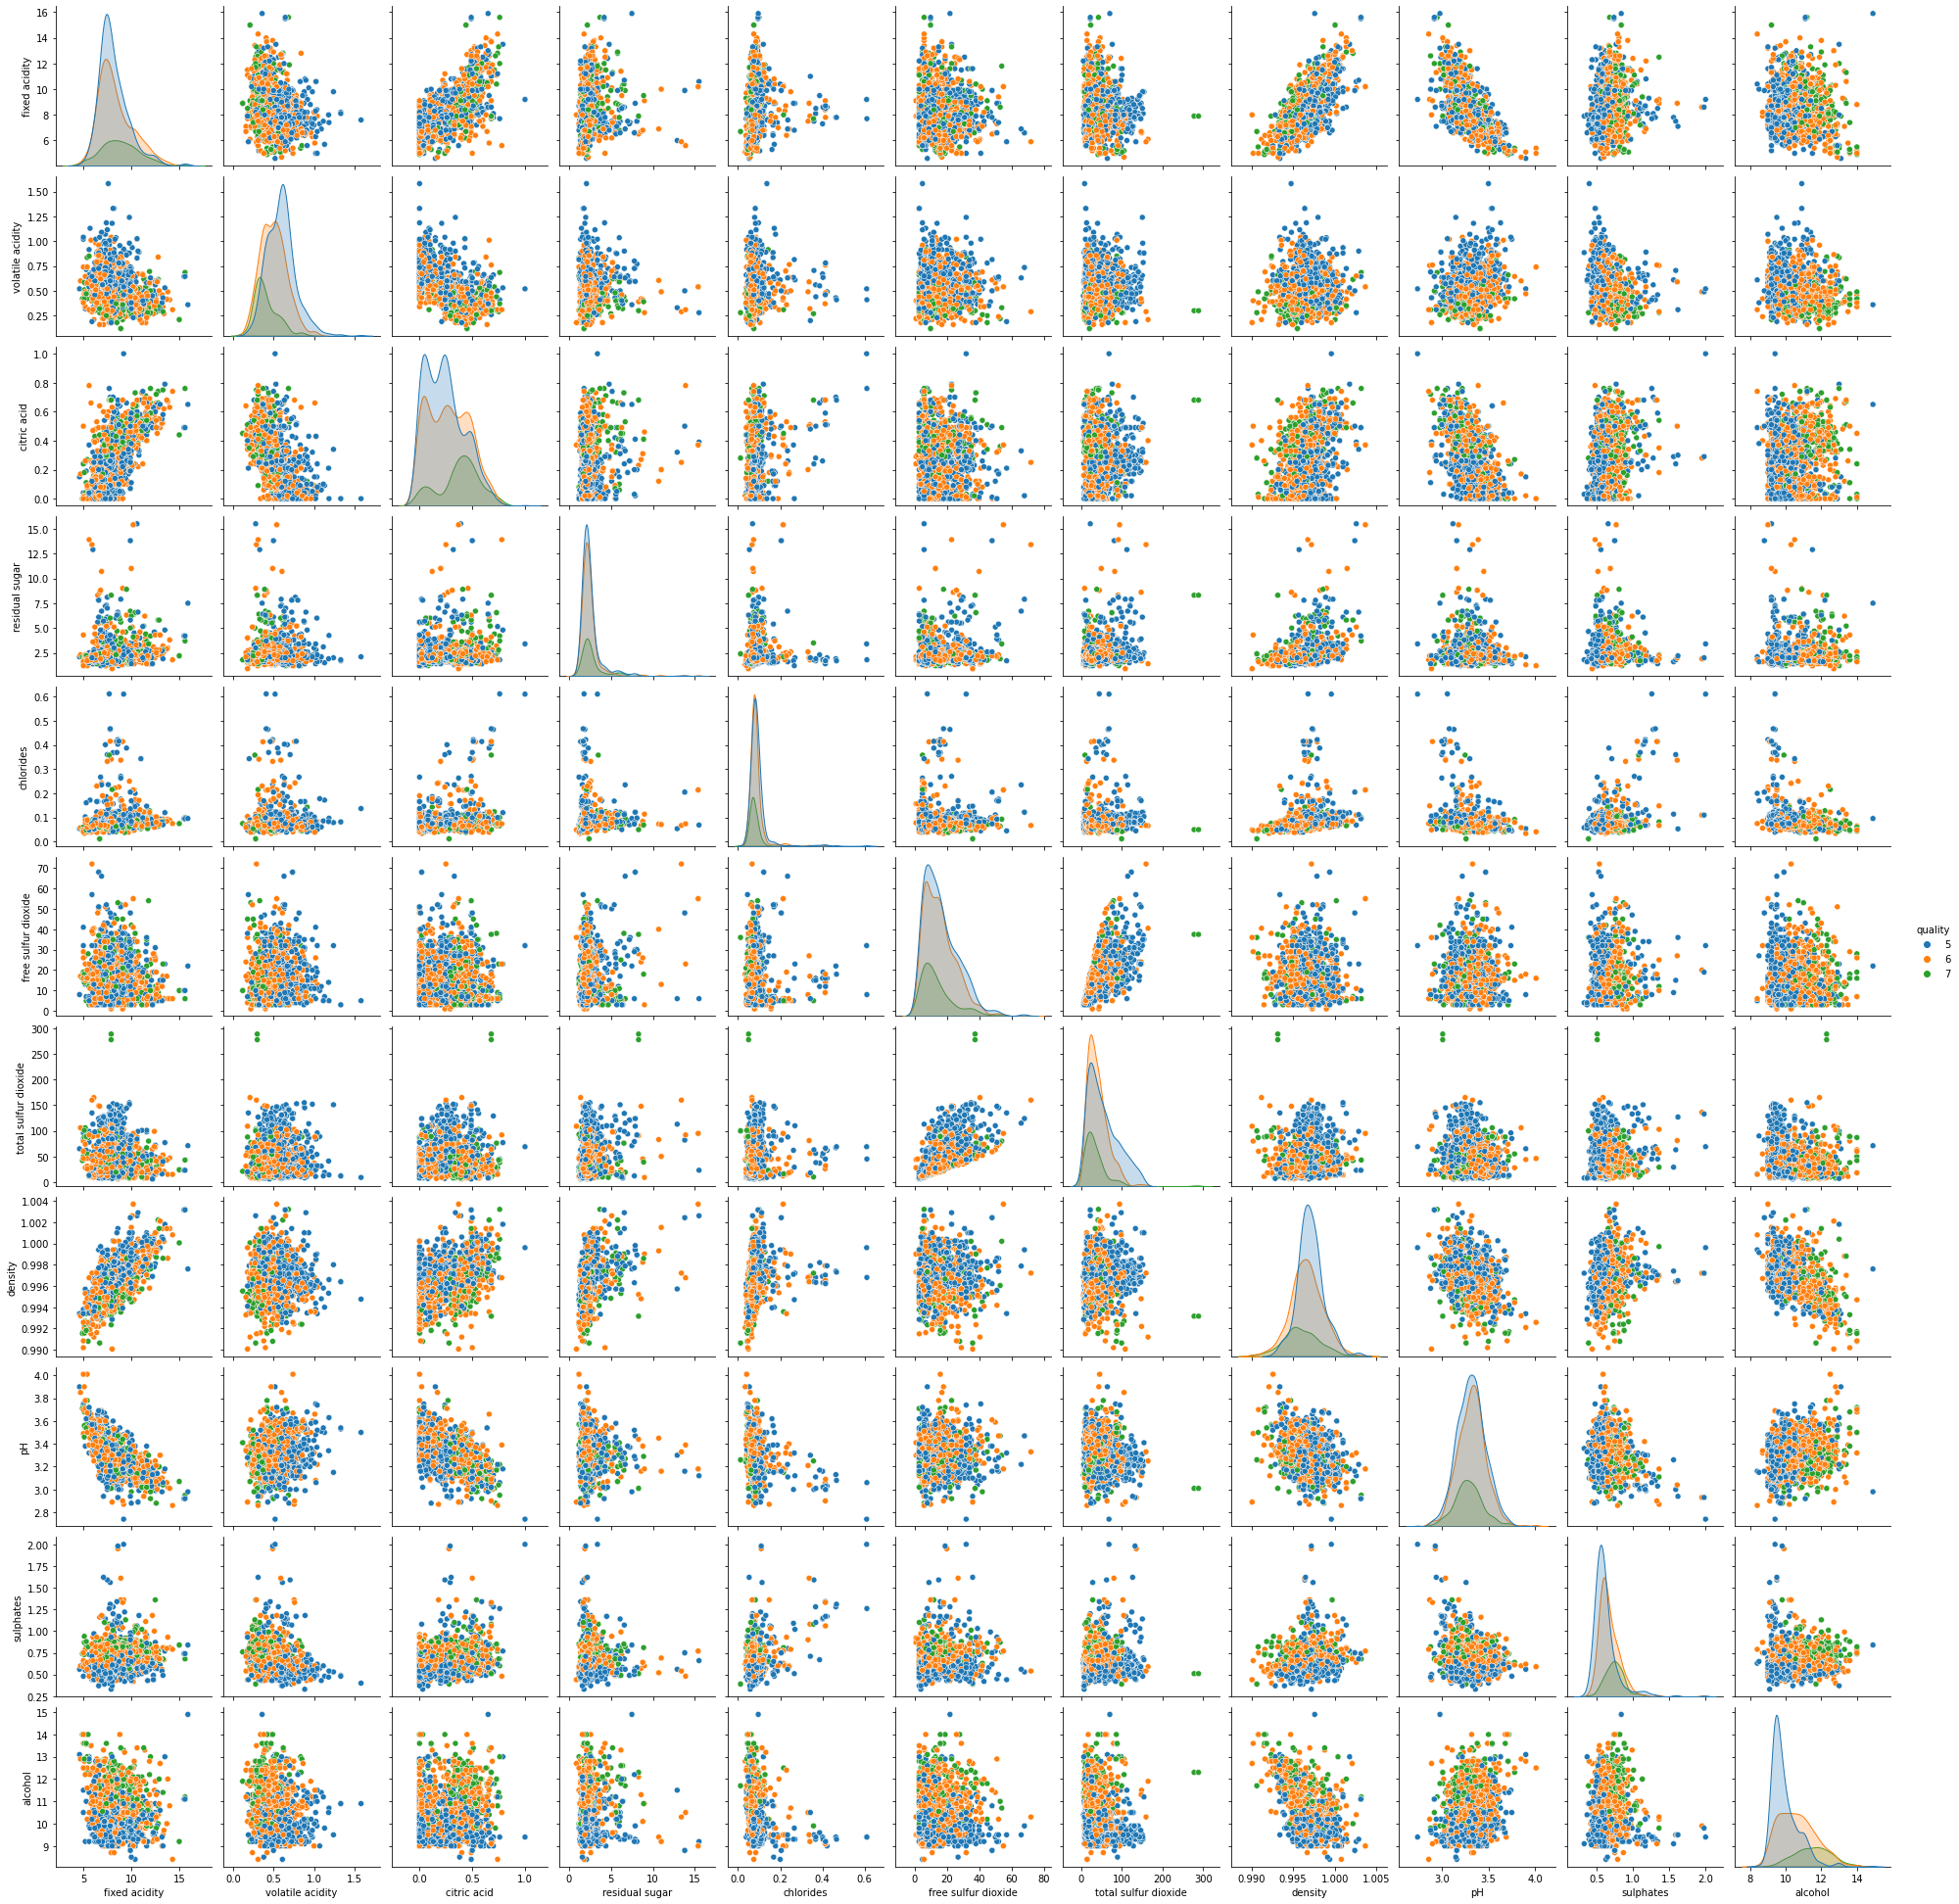

In [6]:
sns.pairplot(wines,hue="quality",palette='tab10')

In [32]:
X = wines.drop(columns=["quality"])
y = wines["quality"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

X_train, X_val, y_train, y_val  = train_test_split(X_train, y_train, test_size=0.2, random_state=1) 

In [33]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=2, random_state=0)
clf_gini.fit(X_train, y_train)
clf_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=0)
clf_entropy.fit(X_train, y_train)

y_pred_gini = clf_gini.predict(X_val)
y_pred_entropy = clf_entropy.predict(X_val)

from sklearn import metrics
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_val, y_pred_gini)))
print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_val, y_pred_entropy)))
conf_mat = metrics.confusion_matrix(y_val, y_pred_gini)
conf_mat = pd.DataFrame(conf_mat, index=[5,6,7], columns=[5,6,7])
conf_mat

Model accuracy score with criterion gini index: 0.5664
Model accuracy score with criterion entropy: 0.5820


,5,6,7
5,98,29,0
6,52,47,0
7,6,24,0


In [34]:
conf_mat = metrics.confusion_matrix(y_val, y_pred_entropy)
conf_mat = pd.DataFrame(conf_mat, index=[5,6,7], columns=[5,6,7])
conf_mat

,5,6,7
5,108,19,0
6,58,41,0
7,9,21,0


In [35]:

y_pred_gini = clf_gini.predict(X_test)
y_pred_entropy = clf_entropy.predict(X_test)
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))
print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_entropy)))

conf_mat = metrics.confusion_matrix(y_test, y_pred_gini)
conf_mat = pd.DataFrame(conf_mat, index=[5,6,7], columns=[5,6,7])
conf_mat

Model accuracy score with criterion gini index: 0.6094
Model accuracy score with criterion entropy: 0.5938


,5,6,7
5,126,28,0
6,65,69,0
7,6,26,0


In [36]:
conf_mat = metrics.confusion_matrix(y_test, y_pred_entropy)
conf_mat = pd.DataFrame(conf_mat, index=[5,6,7], columns=[5,6,7])
conf_mat

,5,6,7
5,137,17,0
6,81,53,0
7,8,24,0


[Text(697.5, 906.0, 'alcohol <= 9.975\ngini = 0.615\nsamples = 1023\nvalue = [463, 405, 155]'),
 Text(348.75, 543.6, 'sulphates <= 0.575\ngini = 0.432\nsamples = 427\nvalue = [298, 121, 8]'),
 Text(174.375, 181.19999999999993, 'gini = 0.286\nsamples = 191\nvalue = [158, 33, 0]'),
 Text(523.125, 181.19999999999993, 'gini = 0.508\nsamples = 236\nvalue = [140, 88, 8]'),
 Text(1046.25, 543.6, 'sulphates <= 0.585\ngini = 0.635\nsamples = 596\nvalue = [165, 284, 147]'),
 Text(871.875, 181.19999999999993, 'gini = 0.567\nsamples = 173\nvalue = [87, 72, 14]'),
 Text(1220.625, 181.19999999999993, 'gini = 0.616\nsamples = 423\nvalue = [78, 212, 133]')]

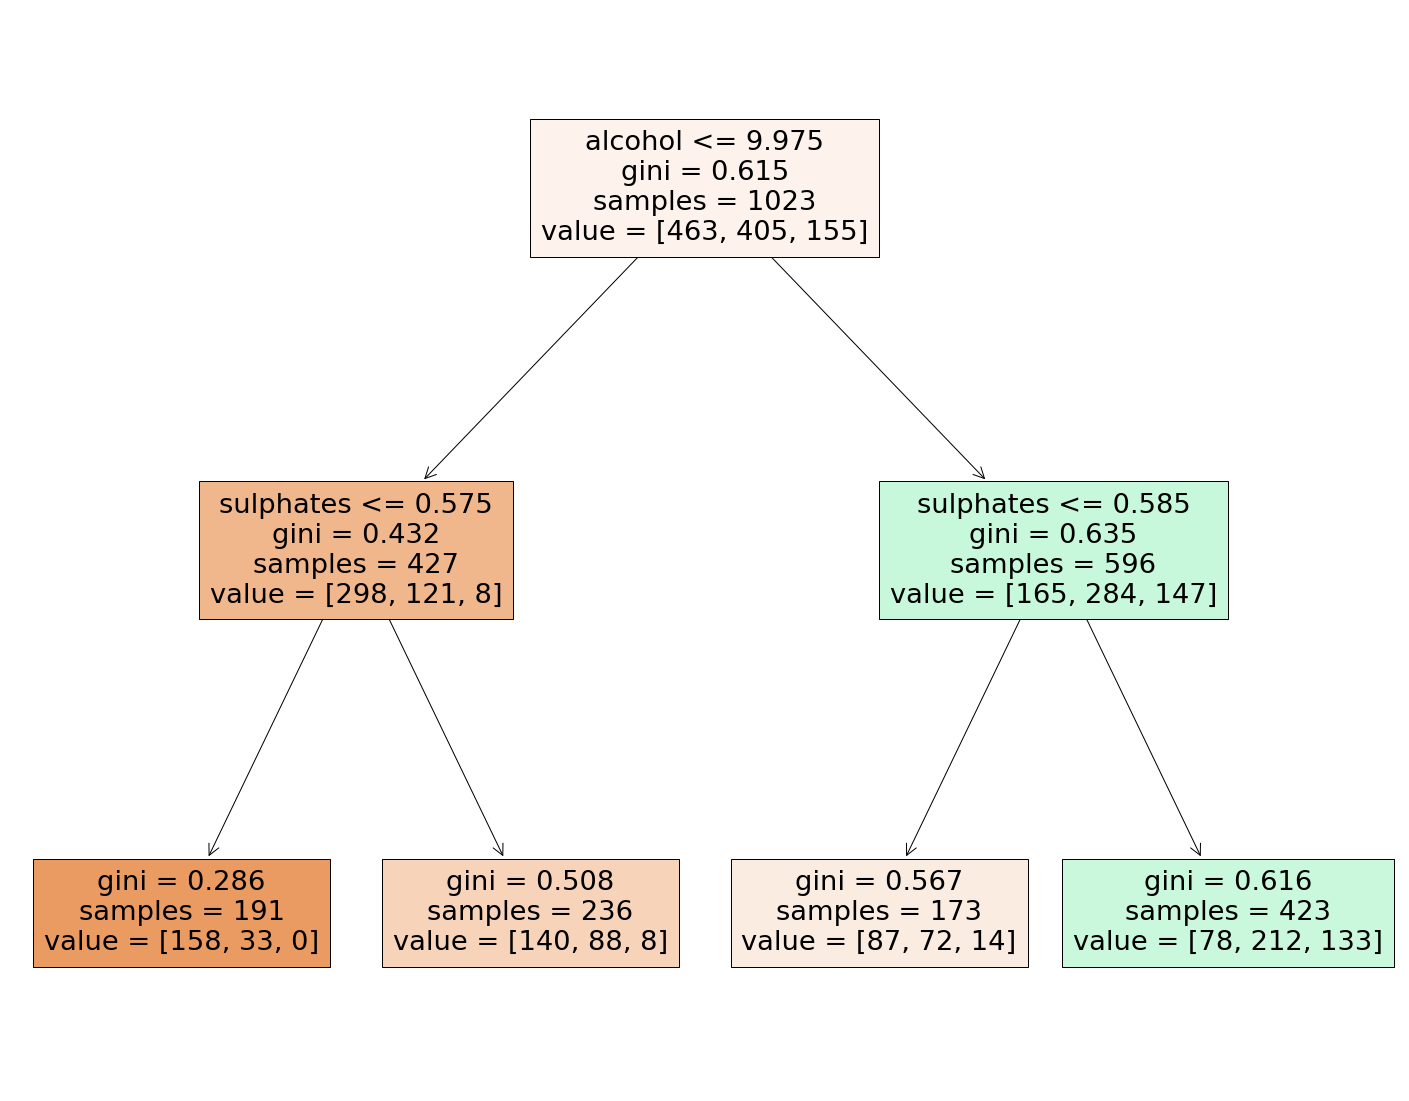

In [37]:
fig = plt.figure(figsize=(25,20))
tree.plot_tree(clf_gini, feature_names=X.columns, filled=True)

[Text(635.2232142857142, 978.48, 'alcohol <= 9.975\ngini = 0.615\nsamples = 1023\nvalue = [463, 405, 155]'),
 Text(274.0178571428571, 761.0400000000001, 'sulphates <= 0.575\ngini = 0.432\nsamples = 427\nvalue = [298, 121, 8]'),
 Text(149.46428571428572, 543.6, 'pH <= 3.54\ngini = 0.286\nsamples = 191\nvalue = [158, 33, 0]'),
 Text(99.64285714285714, 326.1600000000001, 'chlorides <= 0.078\ngini = 0.268\nsamples = 188\nvalue = [158, 30, 0]'),
 Text(49.82142857142857, 108.72000000000003, 'gini = 0.389\nsamples = 72\nvalue = [53, 19, 0]'),
 Text(149.46428571428572, 108.72000000000003, 'gini = 0.172\nsamples = 116\nvalue = [105, 11, 0]'),
 Text(199.28571428571428, 326.1600000000001, 'gini = 0.0\nsamples = 3\nvalue = [0, 3, 0]'),
 Text(398.57142857142856, 543.6, 'total sulfur dioxide <= 89.0\ngini = 0.508\nsamples = 236\nvalue = [140, 88, 8]'),
 Text(298.92857142857144, 326.1600000000001, 'volatile acidity <= 0.412\ngini = 0.531\nsamples = 203\nvalue = [109, 86, 8]'),
 Text(249.1071428571428

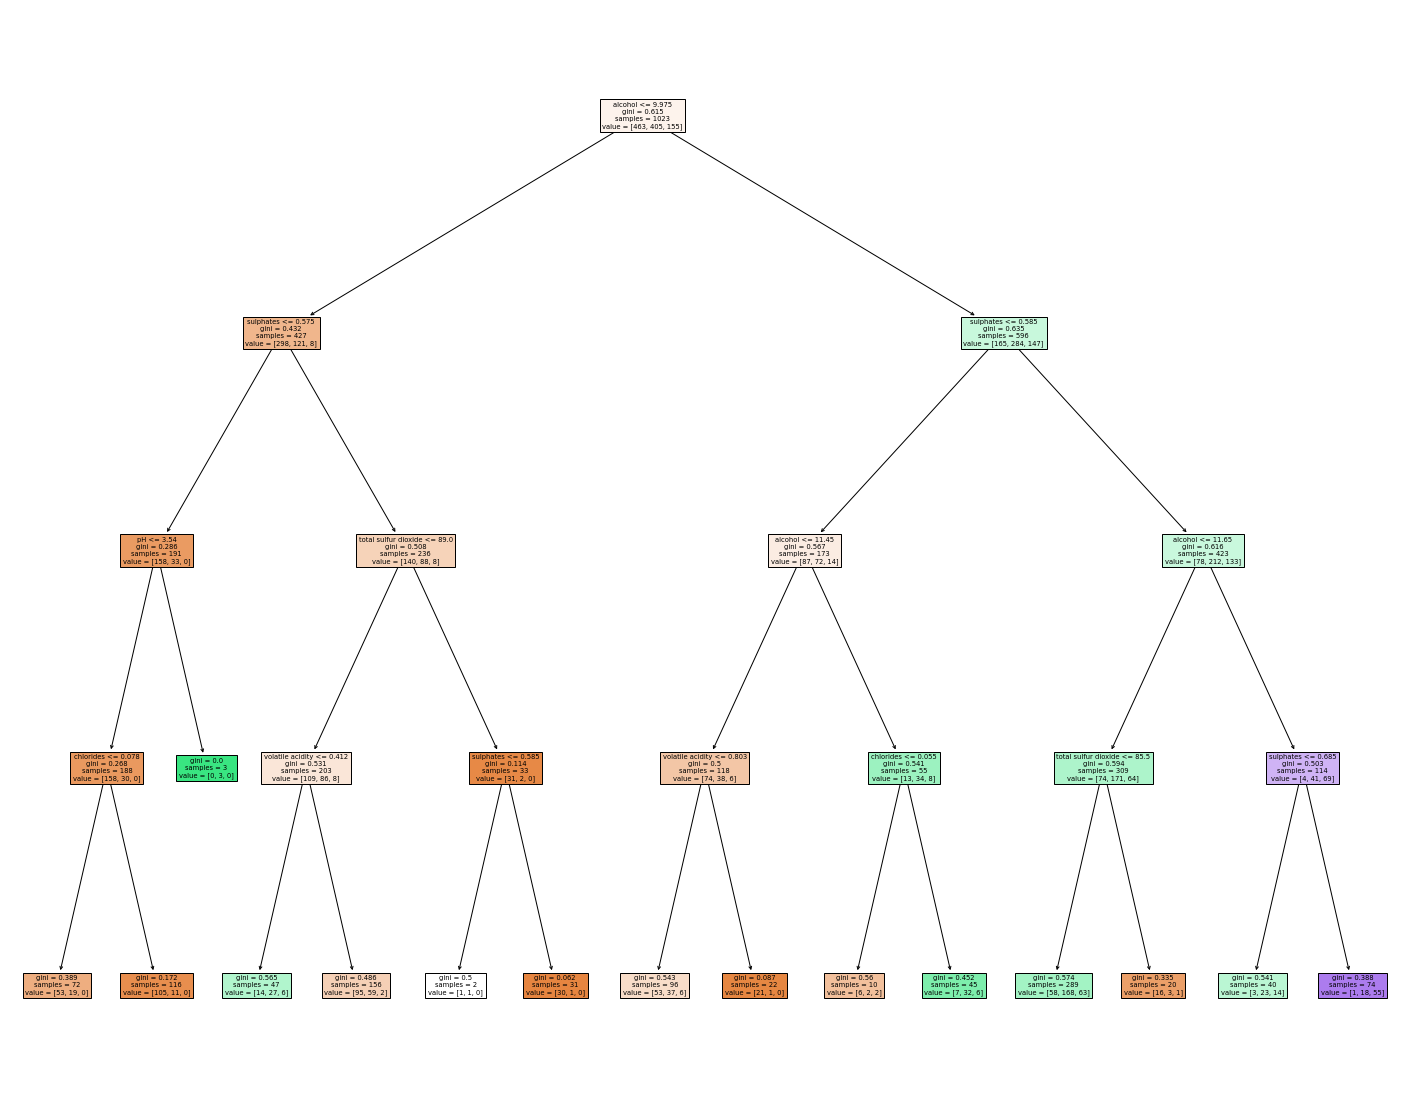

In [38]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=0)
clf_gini.fit(X_train, y_train)
fig = plt.figure(figsize=(25,20))
tree.plot_tree(clf_gini, feature_names=X.columns, filled=True)

[Text(610.3125, 978.48, 'alcohol <= 9.975\ngini = 0.615\nsamples = 1023\nvalue = [463, 405, 155]'),
 Text(290.625, 761.0400000000001, 'sulphates <= 0.575\ngini = 0.432\nsamples = 427\nvalue = [298, 121, 8]'),
 Text(174.375, 543.6, 'pH <= 3.54\ngini = 0.286\nsamples = 191\nvalue = [158, 33, 0]'),
 Text(116.25, 326.1600000000001, 'chlorides <= 0.078\ngini = 0.268\nsamples = 188\nvalue = [158, 30, 0]'),
 Text(58.125, 108.72000000000003, 'gini = 0.389\nsamples = 72\nvalue = [53, 19, 0]'),
 Text(174.375, 108.72000000000003, 'gini = 0.172\nsamples = 116\nvalue = [105, 11, 0]'),
 Text(232.5, 326.1600000000001, 'gini = 0.0\nsamples = 3\nvalue = [0, 3, 0]'),
 Text(406.875, 543.6, 'total sulfur dioxide <= 89.0\ngini = 0.508\nsamples = 236\nvalue = [140, 88, 8]'),
 Text(348.75, 326.1600000000001, 'volatile acidity <= 0.412\ngini = 0.531\nsamples = 203\nvalue = [109, 86, 8]'),
 Text(290.625, 108.72000000000003, 'gini = 0.565\nsamples = 47\nvalue = [14, 27, 6]'),
 Text(406.875, 108.72000000000003, 

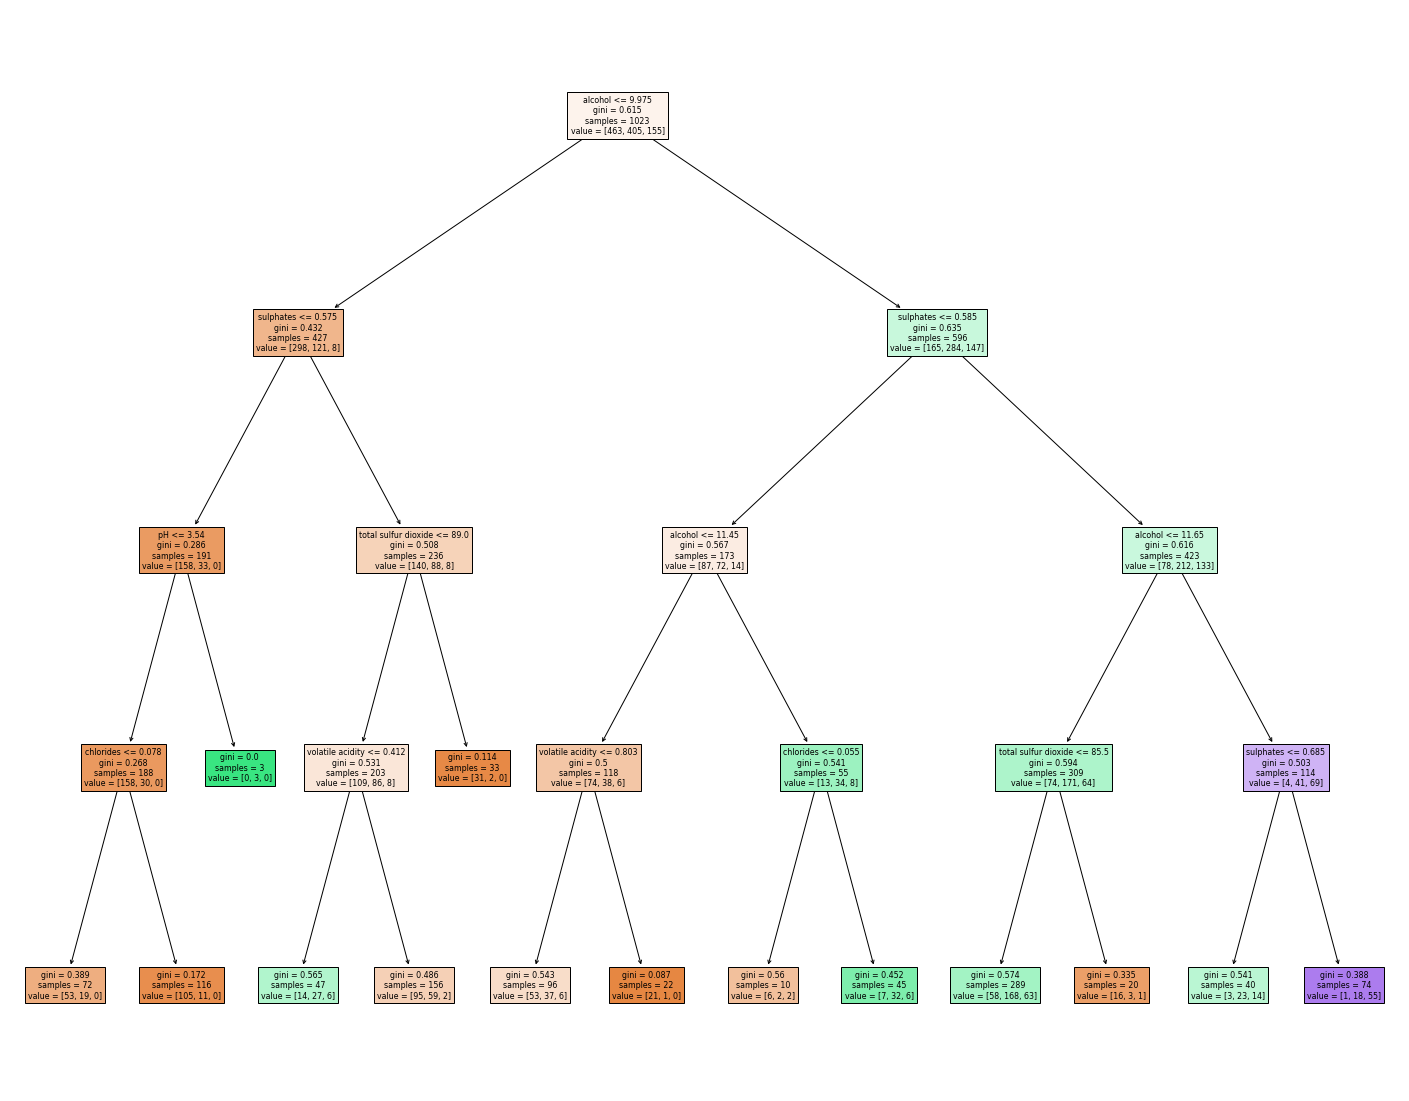

In [39]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=4, min_samples_split=50)
clf_gini.fit(X_train, y_train)
fig = plt.figure(figsize=(25,20))
tree.plot_tree(clf_gini, feature_names=X.columns, filled=True)

In [40]:
y_pred_gini = clf_gini.predict(X_val)
y_pred_entropy = clf_entropy.predict(X_val)
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_val, y_pred_gini)))
print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_val, y_pred_entropy)))
conf_mat = metrics.confusion_matrix(y_val, y_pred_gini)
conf_mat = pd.DataFrame(conf_mat, index=[5,6,7], columns=[5,6,7])
conf_mat


Model accuracy score with criterion gini index: 0.6055
Model accuracy score with criterion entropy: 0.5820


,5,6,7
5,94,33,0
6,42,51,6
7,2,18,10


In [41]:
conf_mat = metrics.confusion_matrix(y_val, y_pred_entropy)
conf_mat = pd.DataFrame(conf_mat, index=[5,6,7], columns=[5,6,7])
conf_mat

,5,6,7
5,108,19,0
6,58,41,0
7,9,21,0


In [44]:
y_pred_gini = clf_gini.predict(X_test)
y_pred_entropy = clf_entropy.predict(X_test)

y_pred_gini = clf_gini.predict(X_test)
y_pred_entropy = clf_entropy.predict(X_test)
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))
print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_entropy)))

conf_mat = metrics.confusion_matrix(y_test, y_pred_gini)
conf_mat = pd.DataFrame(conf_mat, index=[5,6,7], columns=[5,6,7])
conf_mat

Model accuracy score with criterion gini index: 0.6531
Model accuracy score with criterion entropy: 0.5938


,5,6,7
5,122,30,2
6,46,80,8
7,3,22,7


In [45]:
conf_mat = metrics.confusion_matrix(y_test, y_pred_entropy)
conf_mat = pd.DataFrame(conf_mat, index=[5,6,7], columns=[5,6,7])
conf_mat

,5,6,7
5,137,17,0
6,81,53,0
7,8,24,0


# Random Forest

In [46]:
from sklearn.ensemble import RandomForestClassifier

help(RandomForestClassifier)

Help on class RandomForestClassifier in module sklearn.ensemble._forest:

class RandomForestClassifier(ForestClassifier)
 |  RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)
 |  
 |  A random forest classifier.
 |  
 |  A random forest is a meta estimator that fits a number of decision tree
 |  classifiers on various sub-samples of the dataset and uses averaging to
 |  improve the predictive accuracy and control over-fitting.
 |  The sub-sample size is controlled with the `max_samples` parameter if
 |  `bootstrap=True` (default), otherwise the whole dataset is used to build
 |  each tree.
 |  
 |  Read more in the :ref:`User Guide <forest>`.
 |  
 |  Parameters
 |  ----------


In [ ]:
class sklearn.ensemble.RandomForestClassifier(n_estimators=100,# число деревьев
                                              criterion='gini',# метрика 
                                              max_depth=None, # максимальная глубина дерева
                                              min_samples_split=2, # минимальное число индивидов в вершине 
                                              min_samples_leaf=1, # минимальное число индивидов в листе
                                              min_weight_fraction_leaf=0.0, # минимальная доля весов в листе
                                              max_features='sqrt', # способ вычисления числа признаков
                                              max_leaf_nodes=None, # максимальное число листьев
                                              min_impurity_decrease=0.0, # минимальное уменьшение impurity 
                                              # для разделения веришны
                                              bootstrap=True, # использовать бутстреп
                                              oob_score=False,# считать oob score
                                              n_jobs=None, 
                                              random_state=None, 
                                              verbose=0,
                                              warm_start=False, # использовать предыдущее дерево
                                              class_weight=None,# веса классов
                                              ccp_alpha=0.0, # параметр регуляризации стрижки 
                                              max_samples=None # число выборок для бустрепа, актуально только когда bootstrap=True
                                             )

In [50]:
rf_g=RandomForestClassifier(n_estimators=10,verbose=2)
rf_g.fit(X_train,y_train)
rf_pred_g = rf_g.predict(X_val)
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_val, rf_pred_g)))
rf_e=RandomForestClassifier(n_estimators=10,verbose=2,criterion='entropy')
rf_e.fit(X_train,y_train)
rf_pred_e = rf_e.predict(X_val)
print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_val, rf_pred_e)))

building tree 1 of 10
building tree 2 of 10
building tree 3 of 10
building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10
Model accuracy score with criterion gini index: 0.7422
building tree 1 of 10
building tree 2 of 10
building tree 3 of 10
building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10
Model accuracy score with criterion entropy: 0.7109


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


In [51]:
y_pred_gini = rf_g.predict(X_val)
y_pred_entropy = rf_e.predict(X_val)
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_val, y_pred_gini)))
print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_val, y_pred_entropy)))
conf_mat = metrics.confusion_matrix(y_val, y_pred_gini)
conf_mat = pd.DataFrame(conf_mat, index=[5,6,7], columns=[5,6,7])
conf_mat


Model accuracy score with criterion gini index: 0.7422
Model accuracy score with criterion entropy: 0.7109


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


,5,6,7
5,101,25,1
6,24,71,4
7,1,11,18


In [52]:
conf_mat = metrics.confusion_matrix(y_val, y_pred_entropy)
conf_mat = pd.DataFrame(conf_mat, index=[5,6,7], columns=[5,6,7])
conf_mat

,5,6,7
5,101,24,2
6,29,59,11
7,1,7,22


In [53]:
rf_g=RandomForestClassifier(n_estimators=100,verbose=2)
rf_g.fit(X_train,y_train)
rf_pred_g = rf_g.predict(X_val)
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_val, rf_pred_g)))
rf_e=RandomForestClassifier(n_estimators=100,verbose=2,criterion='entropy')
rf_e.fit(X_train,y_train)
rf_pred_e = rf_e.predict(X_val)
print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_val, rf_pred_e)))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [54]:
y_pred_gini = rf_g.predict(X_val)
y_pred_entropy = rf_e.predict(X_val)
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_val, y_pred_gini)))
print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_val, y_pred_entropy)))
conf_mat = metrics.confusion_matrix(y_val, y_pred_gini)
conf_mat = pd.DataFrame(conf_mat, index=[5,6,7], columns=[5,6,7])
conf_mat


Model accuracy score with criterion gini index: 0.7305
Model accuracy score with criterion entropy: 0.7539


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


,5,6,7
5,103,24,0
6,25,68,6
7,0,14,16


In [55]:
conf_mat = metrics.confusion_matrix(y_val, y_pred_entropy)
conf_mat = pd.DataFrame(conf_mat, index=[5,6,7], columns=[5,6,7])
conf_mat

,5,6,7
5,103,24,0
6,21,71,7
7,0,11,19
